In [1]:
import numpy as np

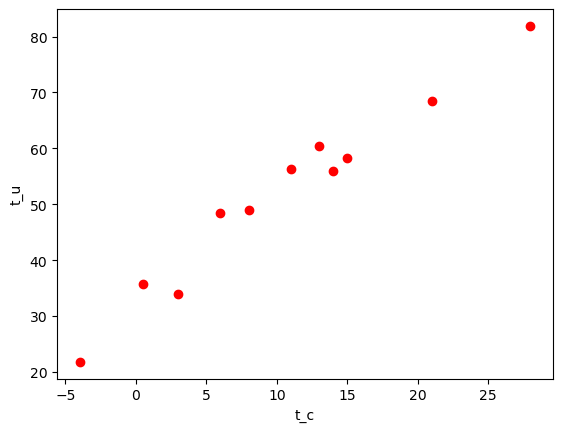

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

#Plotting the data
import matplotlib.pyplot as plt

plt.plot(t_c, t_u, 'ro')
plt.xlabel('t_c')
plt.ylabel('t_u')
plt.show()

In [3]:
#Definining the physical model
def model(t_u, w, b): # = t_c
    return w * t_u + b

In [27]:
#Defining the loss/cost function
#Root Mean Square Error
def loss_fn(y_pred,y_true): #RMSE
    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_true - y_pred)**2, axis=0))
    return rmse
    

In [28]:
w = np.ones(()) #w = 1
b = np.zeros(()) #b = 0

t_p = model(t_u, w, b)
t_p

array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

In [29]:
loss = loss_fn(t_p, t_c)
loss

41.99862551863508

In [ ]:
#Updating values based on the loss function
delta = 0.1
#dlw_dt : Loss rate of change of w #i.e finding the gradient of the loss function with respect to each parameter!
dlw_dt = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u,w-delta, b), t_c)) / (2.0 * delta)
dlb_dt =   (loss_fn(model(t_u, w, b + delta), t_c)- loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b- learning_rate * loss_rate_of_change_b
#Gradient Descent
learning_rate = 1e-2

w = w - learning_rate * dlw_dt
b = b - learning_rate * dlb_dt

In [31]:
def derivative(func, x, h=1e-6):
    """
    Numerically approximate the derivative of a function at a given point using finite differences.
    
    Parameters:
        func (callable): The function to differentiate.
        x (float): The point at which to compute the derivative.
        h (float): The step size for finite differences (default is 1e-6).
    
    Returns:
        float: The approximate derivative of the function at the given point.
    """
    return (func(x + h) - func(x - h)) / (2 * h)

# Example usage:
# Define a function
def f(x):
    return (x+1 + x**2)**2

# Compute the derivative of the function f(x) at x=2
x = 2
derivative_value = derivative(f, x)
print("Derivative of f(x) at x=2:", derivative_value)

Derivative of f(x) at x=2: 70.00000000445539


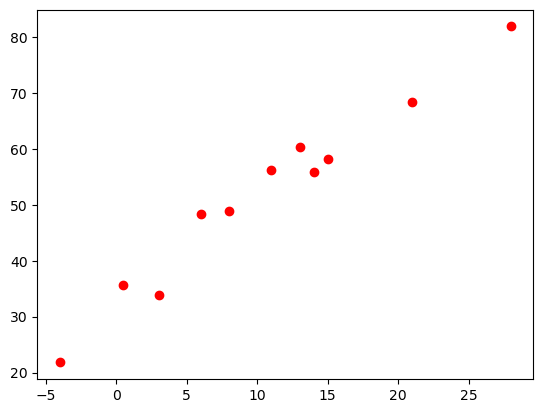

x :  torch.Size([]) y :  torch.Size([3, 1])
z :  torch.Size([1, 3]) a :  torch.Size([2, 1, 1])
x * y :  torch.Size([3, 1])
y * z :  torch.Size([3, 3])
y * z * a :  torch.Size([2, 3, 3])
Epoch loss : 1  loss  80.36434173583984
  params:  tensor([1.7761, 0.1064])
  grad:  tensor([-77.6140, -10.6400])
Epoch loss : 2  loss  37.574913024902344
  params:  tensor([2.0848, 0.1303])
  grad:  tensor([-30.8623,  -2.3864])
Epoch loss : 3  loss  30.871076583862305
  params:  tensor([2.2094, 0.1217])
  grad:  tensor([-12.4631,   0.8587])
...
Epoch loss : 10  loss  29.030488967895508
  params:  tensor([ 2.3232, -0.0710])
  grad:  tensor([-0.5355,  2.9295])
Epoch loss : 11  loss  28.941877365112305
  params:  tensor([ 2.3284, -0.1003])
  grad:  tensor([-0.5240,  2.9264])
...
Epoch loss : 99  loss  22.21418571472168
  params:  tensor([ 2.7508, -2.4910])
  grad:  tensor([-0.4453,  2.5208])
Epoch loss : 100  loss  22.148710250854492
  params:  tensor([ 2.7553, -2.5162])
  grad:  tensor([-0.4446,  2.5165]

In [32]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)


import matplotlib.pyplot as plt

plt.plot(t_c, t_u, 'ro')
plt.show()


def model(t_u, w, b): # = t_c
    return w * t_u + b

#Root Mean Square Error
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return np.sqrt(squared_diffs.mean())


w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p


loss = loss_fn(t_p, t_c)
loss

x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2,1,1)

print("x : ", x.shape,"y : ", y.shape)
print("z : ", z.shape,"a : ", a.shape)

print("x * y : ", (x * y).shape)
print("y * z : ",(y * z).shape)
print("y * z * a : ", (y * z * a).shape)
    
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
    loss_fn(model(t_u,w-delta, b), t_c)) / (2.0 * delta)

learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c)-
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b- learning_rate * loss_rate_of_change_b

# derivative of loss 
def dloss_fn(t_p, t_c):
    # same as
    # sqared_diffs = (t_p - t_c)**2
    # return squred_diffs.mean()
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs
# derivative of model w.r.t w
def dmodel_dw(t_u, w, b):
    return t_u
# derivativ of model w.r.t b
def dmodel_db(t_u, w, b):
    return 1.0

# chain rule in action
def grad_dn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

# how stack works
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
torch.stack([a,b])

# def training_loop(n_epochs, learning_rate,params, t_u, t_c):
#     for epoch in range(1, n_epochs+1):
#         w, b = params
        
#         t_p = model(t_u, w,b)
#         loss = loss_fn(t_p, t_c)
#         grad = grad_dn(t_u, t_c, t_p, w, b)
        
#         params = params - learning_rate * grad
        
#         print("Epoch : ", epoch, " loss : ", loss)
#     return params

# training_loop(n_epochs = 100, learning_rate=1e-2, params= torch.tensor([1.0, 0.0]), t_u=t_u, t_c=t_c)


def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_dn(t_u, t_c, t_p, w, b)
        
        params = params - learning_rate * grad
        
        if epoch in {1,2,3,10,11,99,100,4000,5000}:
            print('Epoch loss :', epoch, " loss ", float(loss))
            if print_params:
                print('  params: ', params)
                print('  grad: ', grad)
        
        if epoch in {4, 12, 101}:
            print('...')
        
        if not torch.isfinite(loss).all():
            break
    return params

t_un = 0.1 * t_u #Normalizing input

params = training_loop(n_epochs = 100, learning_rate=1e-2, params= torch.tensor([1.0, 0.0]), t_u=t_un, t_c=t_c)

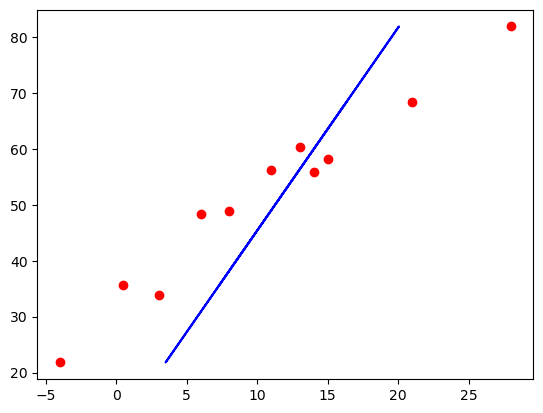

In [35]:
plt.figure()
plt.plot(t_c, t_u, 'ro')
plt.plot(model(t_un, params[0],params[1]),t_u,'b-')
plt.show()

In [36]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def neural_network_fit(X, y, hidden_units=4, learning_rate=0.01, max_iter=1000):
    np.random.seed(1)
    input_units = X.shape[1]
    output_units = y.shape[1]

    # Initialize weights
    hidden_weights = np.random.randn(input_units, hidden_units)
    output_weights = np.random.randn(hidden_units, output_units)

    for _ in range(max_iter):
        # Forward propagation
        hidden_layer_input = np.dot(X, hidden_weights)
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, output_weights)
        predicted_output = sigmoid(output_layer_input)

        # Backpropagation
        output_error = y - predicted_output
        output_delta = output_error * sigmoid_derivative(predicted_output)
        hidden_error = output_delta.dot(output_weights.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

        # Update weights
        output_weights += hidden_layer_output.T.dot(output_delta) * learning_rate
        hidden_weights += X.T.dot(hidden_delta) * learning_rate

    return hidden_weights, output_weights

# Example usage:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input features
y = np.array([[0], [1], [1], [0]])  # Target values

hidden_weights, output_weights = neural_network_fit(X, y)

# Test the trained model
hidden_layer_input = np.dot(X, hidden_weights)
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, output_weights)
predicted_output = sigmoid(output_layer_input)

print("Predicted Output:")
print(predicted_output)


Predicted Output:
[[0.36149226]
 [0.58621226]
 [0.4915809 ]
 [0.66916176]]
